## Import libraries

In [1]:

import pyrealsense2 as rs
import numpy as np
import cv2
from matplotlib import pyplot as plt


## Add filters for depth image
https://github.com/IntelRealSense/librealsense/blob/jupyter/notebooks/depth_filters.ipynb


In [2]:
decimation = rs.decimation_filter()
decimation.set_option(rs.option.filter_magnitude, 4)

spatial = rs.spatial_filter()
spatial.set_option(rs.option.filter_magnitude, 5)
spatial.set_option(rs.option.filter_smooth_alpha, 1)
spatial.set_option(rs.option.filter_smooth_delta, 50)
spatial.set_option(rs.option.holes_fill, 3)

temporal = rs.temporal_filter()

hole_filling = rs.hole_filling_filter()

depth_to_disparity = rs.disparity_transform(True)
disparity_to_depth = rs.disparity_transform(False)


rs.sensor members:

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'as_depth_sensor', 'as_roi_sensor', 'close', 'get_info', 'get_option', 'get_option_description', 'get_option_range', 'get_option_value_description', 'get_stream_profiles', 'is_depth_sensor', 'is_option_read_only', 'is_roi_sensor', 'open', 'profiles', 'set_notifications_callback', 'set_option', 'start', 'stop', 'supports']

rs.option members:

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__int__', '__le__', '__lt__', '__members__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', 'accuracy', 'asic_temperature', 'auto_exposure_converge_step', 'auto_exposure_mode', 'auto_exposure_priority', 'backlight_compensation', 'brightness', 'color_scheme', 'confidence_threshold', 'contrast', 'depth_units', 'emitter_enabled', 'enable_auto_exposure', 'enable_auto_white_balance', 'enable_motion_correction', 'error_polling_enabled', 'exposure', 'filter_magnitude', 'filter_option', 'filter_smooth_alpha', 'filter_smooth_delta', 'frames_queue_size', 'gain', 'gamma', 'histogram_equalization_enabled', 'holes_fill', 'hue', 'inter_cam_sync_mode', 'laser_power', 'max_distance', 'min_distance', 'motion_module_temperature', 'motion_range', 'output_trigger_enabled', 'power_line_frequency', 'projector_temperature', 'saturation', 'sharpness', 'stereo_baseline', 'stream_filter', 'stream_format_filter', 'stream_index_filter', 'texture_source', 'total_frame_drops', 'visual_preset', 'white_balance']


In [3]:
#print(dir(rs.sensor))
#print()
#print(dir(rs.option))

In [27]:
# Configure depth and color streams
width = 848
height = 480
frame_rate = 30

pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.depth, width, height, rs.format.z16, frame_rate)
config.enable_stream(rs.stream.color, width, height, rs.format.bgr8, frame_rate)

# Start streaming
profile = pipeline.start(config)

# default depth_uits = 0.0010000000474974513
depth_sensor = profile.get_device().first_depth_sensor()
color_sensor = profile.get_device().sensors[1]

#print(profile.get_device().sensors[0].is_depth_sensor())
#0.001 (1mm) range 65m
#0.0001 (0.1mm) range 6.5m (min allowed)
#0.00001 (0.01mm) range 0.65m (error in set option)

depth_sensor.set_option(rs.option.depth_units,0.0001)

depth_sensor.get_option(rs.option.depth_units)
depth_scale = profile.get_device().first_depth_sensor().get_depth_scale()
print(depth_scale)


print(depth_sensor.get_option(rs.option.enable_auto_exposure))
depth_sensor.set_option(rs.option.enable_auto_exposure,False)
depth_sensor.set_option(rs.option.exposure,200)
color_sensor.set_option(rs.option.enable_auto_exposure,False)
color_sensor.set_option(rs.option.exposure,200)


9.999999747378752e-05
0.0


In [28]:



frame = None
depth_frame = None
color_frame = None
depth_frame_1 = None
frame_count = 0
align = rs.align(rs.stream.color)
colorizer = rs.colorizer()

# ignore the first few frames, to allow the camera auto-exposure to stabilise
while (frame_count < 30):
    frame = pipeline.wait_for_frames()
    frame_count += 1


Frame object members:

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'as_depth_frame', 'as_frame', 'as_frameset', 'as_points', 'as_video_frame', 'data', 'first', 'first_or_default', 'foreach', 'frame_number', 'frame_timestamp_domain', 'get_color_frame', 'get_data', 'get_depth_frame', 'get_frame_metadata', 'get_frame_number', 'get_frame_timestamp_domain', 'get_infrared_frame', 'get_profile', 'get_timestamp', 'is_depth_frame', 'is_frame', 'is_frameset', 'is_points', 'is_video_frame', 'keep', 'profile', 'size', 'supports_frame_metadata', 'swap', 'timestamp']


In [29]:
#print(dir(frame))

In [30]:
import time

# frame.timestamp = 1540527901222.4421
# time.time()     = 1540527908.8422644
# frame.timestamp is in ms
print(frame.timestamp)
print(time.time())

1540627536587.7864
1540627545.6041312


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

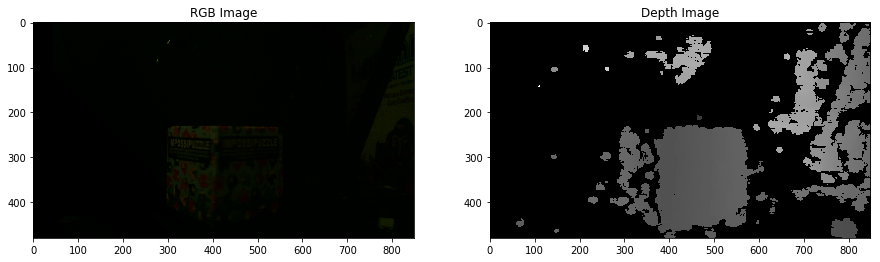

In [33]:
imgfolder = "D:/d435/test/"
frame_count = 0
frame_time = 0.0

while (frame_count < 1000):
    frame = pipeline.wait_for_frames()
    frame = align.process(frame)
    frame_time = frame.timestamp
    
    depth_filename = imgfolder + "d_" + str(frame_time) + ".npy"
    color_filename = imgfolder + "c_" + str(frame_time) + ".npy"
    
    depth_frame = frame.get_depth_frame()
    color_frame = frame.get_color_frame()

    # Convert images to numpy arrays
    depth_image = np.asanyarray(depth_frame.get_data())
    color_image = np.asanyarray(color_frame.get_data())
    
    np.save(depth_filename, depth_image)
    np.save(color_filename, color_image)
    # depth_frame = np.load(depth_filename)
    print(frame_count)
    frame_count += 1
    


colorized_depth = np.asanyarray(colorizer.colorize(depth_frame).get_data())

# Apply colormap on depth image (image must be converted to 8-bit per pixel first)
depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)

# Stack both images horizontally
#images = np.hstack((color_image, colorized_depth))

# Show images
fig = plt.figure(figsize=(15, 15))
table1 = fig.add_subplot(1,2,1)
table1.set_title("RGB Image")
table1.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))

table2 = fig.add_subplot(1,2,2)
table2.set_title("Depth Image")
table2.imshow(depth_image, cmap='gray')

#table3 = fig.add_subplot(1,3,3)
#table3.set_title("Depth Image Filtered Over 30 Frames")
#table3.imshow(cv2.cvtColor(colorized_depth, cv2.COLOR_BGR2RGB))



In [70]:
print(depth_image_1.shape)
print(depth_image_1[450,180])
print(depth_image_1[450,180]*depth_scale)

print(color_image.shape)
print(color_image[450,180])


(720, 1280)
24451
2.44509993823
(720, 1280, 3)
[10 11  8]


In [5]:

# Stop streaming
pipeline.stop()

fig = plt.figure(figsize=(15, 15))
plt.imshow(depth_image, cmap='gray')
plt.show()


RuntimeError: stop() cannot be called before start()

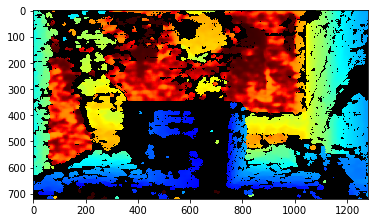

In [72]:
plt.imshow(colorized_depth)

In [73]:

# distance in m
#depth = depth * depth_scale
#dist,_,_,_ = cv2.mean(depth)

min_dist = depth_image.min()
print(min_dist)
max_dist = depth_image.max()
print(max_dist)


0
65535
